In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import gmaps
from api_keys import g_key

In [248]:
toronto_collision= pd.read_csv('Resources/Fatal_Collisions_toronto.csv')
toronto_income= pd.read_csv('Resources/income_toronto.csv')

In [249]:
toronto_collision.columns

Index(['X', 'Y', 'Index_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'Hour', 'STREET1',
       'STREET2', 'OFFSET', 'ROAD_CLASS', 'District', 'WardNum', 'WardNum_X',
       'WardNum_Y', 'Division', 'Division_X', 'Division_Y', 'LATITUDE',
       'LONGITUDE', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT',
       'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY',
       'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND',
       'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND',
       'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'Hood_ID', 'Neighbourhood',
       'ObjectId'],
      dtype='object')

In [250]:
toronto_collision=toronto_collision[['X', 'Y', 'District','Neighbourhood','YEAR', 'VEHTYPE','DATE', 'Hour']]


In [251]:
toronto_collision=toronto_collision.rename(columns={'X':'Longitude',
                                                    'Y':'Latitude',
                                                    'YEAR':'Year',
                                                    'VEHTYPE':'Vehicle Type',
                                                    'DATE':'Date', 
                                                    })

In [252]:
toronto_collision.head()

,Longitude,Latitude,District,Neighbourhood,Year,Vehicle Type,Date,Hour
0,-79.227590,43.816245,Scarborough,Agincourt/Malvern,2012.0,Other,2012-01-12T05:00:00.000Z,5.0
1,-79.447742,43.637614,Toronto and East York,South Parkdale/King West,2013.0,"Automobile, Station Wagon",2013-11-29T05:00:00.000Z,5.0
2,-79.259883,43.716773,Scarborough,Clairlea-Birchmount,2018.0,Motorcycle,2018-06-14T04:00:00.000Z,5.0
3,-79.316890,43.821345,Scarborough,Bayview Woods-Steeles/Hillcrest Village,2010.0,Other,2010-04-13T04:00:00.000Z,5.0
4,-79.574641,43.728129,Etobicoke York,Rexdale-Kipling,2014.0,,2014-11-09T05:00:00.000Z,5.0


In [253]:
toronto_collision.Neighbourhood.nunique()

100

In [254]:
toronto_data=pd.merge(toronto_collision,toronto_income, how='outer',on='Neighbourhood')
toronto_data=toronto_data.rename(columns={'Median Household Income Before Taxes':'Median Income'})

In [255]:
toronto_data.to_csv('Resources/toronto_cleaned.csv')
toronto_data=toronto_data.dropna()

In [256]:
toronto_data.Neighbourhood.unique()
toronto_data['Median Income'].unique()

array([ 68108.,  63425.,  68524.,  74082.,  63232.,  51867.,  63479.,
        70741., 100365.,  57986.,  56366.,  82753.,  67995.,  78479.,
        62871.,  69997.,  65167.,  81253.,  57414.,  63778.,  93566.,
        66048.,  56942.,  51999.,  75291.,  44216.,  80384.,  49252.,
        56051., 151552.,  67525.,  58246.,  68996.,  77819.,  52988.,
        52721.,  48917.,  73547.,  48737.,  90620., 106194., 119484.,
        72429.,  69274., 151885.,  65714.,  77824.,  70920.,  60824.,
        54908.,  73216.,  80896.,  49568.,  56053.,  67355.,  53177.,
        61725.,  62837.,  60292.,  61536.,  87538.,  58921.,  61184.,
       126930.,  53081.,  71812., 101482.,  85138., 144963.,  93586.,
        57780.,  55839.,  45696.,  84113.,  41016., 116672.,  51028.,
        80136.,  60899.,  83249.,  59576.,  59729.,  50891.,  69634.,
        61110.,  66089.,  52162.,  74608.,  58003.,  71584.,  54101.,
        52731.,  93022.,  88872.,  63130.,  62976.,  98420.,  65126.,
        56644.,  727

In [257]:
#place nighbourhood and income data into lists
neighbourhoods=list(toronto_data.Neighbourhood.unique())
income=list(toronto_data['Median Household Income Before Taxes'].unique())
print(len(income))
print(len(neighbourhoods))

KeyError: 'Median Household Income Before Taxes'

In [315]:
#Create dataframe to hold collisions in each neighbourhood (#Group by neighbourhoods)
hood_collisions=pd.DataFrame(toronto_data.groupby('Neighbourhood')['District'].count())
hood_collisions=hood_collisions.rename(columns={
    'District':'Number of Collisions'})

hood_income=pd.DataFrame(toronto_data.groupby('Neighbourhood')['Median Income'].max())

hood_data=pd.merge(hood_collisions,hood_income, on='Neighbourhood')
hood_data=hood_data.sort_values('Median Income',ascending=False)
hood_data.max()

Number of Collisions        26.0
Median Income           151885.0
dtype: float64

In [316]:
#Dependent varaible is collisions (y)
x_axis=hood_data['Median Income']
y_axis=hood_data['Number of Collisions']

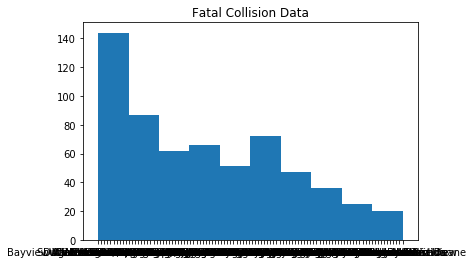

In [323]:
plt.hist(toronto_data['Neighbourhood'])
plt.title('Fatal Collision Data')
plt.savefig('Figures/collisions_hist.png')

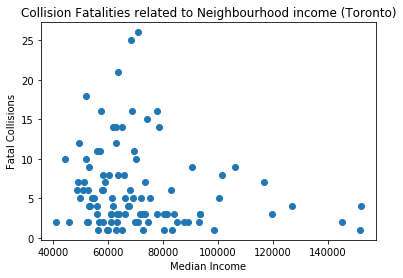

In [325]:
plt.scatter(x_axis,y_axis)
plt.title('Collision Fatalities related to Neighbourhood income (Toronto)')
plt.xlabel('Median Income')
plt.ylabel('Fatal Collisions')
plt.savefig('Figures/collisions_v_income.png')

In [262]:
# use google maps to create heat map
gmaps.configure(api_key=g_key)


In [272]:
toronto_data['Median Income']
toronto_data['Median Income'] = toronto_data['Median Income'].astype(float)
toronto_data.head(30)

,Longitude,Latitude,District,Neighbourhood,Year,Vehicle Type,Date,Hour,Median Income
0,-79.227590,43.816245,Scarborough,Agincourt/Malvern,2012.0,Other,2012-01-12T05:00:00.000Z,5.0,68108.0
1,-79.263774,43.801421,Scarborough,Agincourt/Malvern,2015.0,,2015-11-24T05:00:00.000Z,6.0,68108.0
2,-79.200870,43.805159,Scarborough,Agincourt/Malvern,2015.0,"Automobile, Station Wagon",2015-10-06T04:00:00.000Z,6.0,68108.0
3,-79.224290,43.816945,Scarborough,Agincourt/Malvern,2009.0,Other,2009-10-23T04:00:00.000Z,7.0,68108.0
4,-79.289455,43.785750,Scarborough,Agincourt/Malvern,2014.0,,2014-08-16T04:00:00.000Z,5.0,68108.0
5,-79.290668,43.811160,Scarborough,Agincourt/Malvern,2016.0,,2016-12-13T05:00:00.000Z,14.0,68108.0
6,-79.284890,43.800545,Scarborough,Agincourt/Malvern,2011.0,"Automobile, Station Wagon",2011-09-01T04:00:00.000Z,15.0,68108.0
7,-79.240070,43.793505,Scarborough,Agincourt/Malvern,2017.0,,2017-06-13T04:00:00.000Z,16.0,68108.0
8,-79.243068,43.812960,Scarborough,Agincourt/Malvern,2015.0,,2015-03-04T05:00:00.000Z,16.0,68108.0
9,-79.263789,43.801444,Scarborough,Agincourt/Malvern,2013.0,,2013-07-08T04:00:00.000Z,17.0,68108.0


In [264]:
# Store more general long lat for each area



In [312]:
locations = toronto_data[["Latitude", "Longitude"]].astype(float)
income= toronto_data['Median Income']
heatmap_layer.gradient = [
    'yellow',
    'green',
    'red'
]

fig = gmaps.figure(center=(43.72,-79.3), zoom_level=10.5)
heatmap_layer = gmaps.heatmap_layer(locations, weights=toronto_data['Median Income'], max_intensity=100000, point_radius=6.0)
fig.add_layer(heatmap_layer)
fig.add_layer(gmaps.bicycling_layer())

fig

Figure(layout=FigureLayout(height='420px'))